In [74]:
# Install required libraries if not already installed
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [76]:
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv("advertising.csv")

# Display the first few rows
df.head()


Saving advertising.csv to advertising (1).csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [77]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Display dataset info
df.info()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


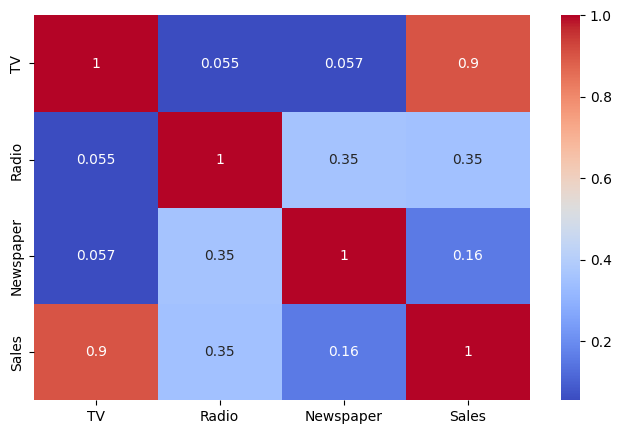

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [79]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

print(df.columns)



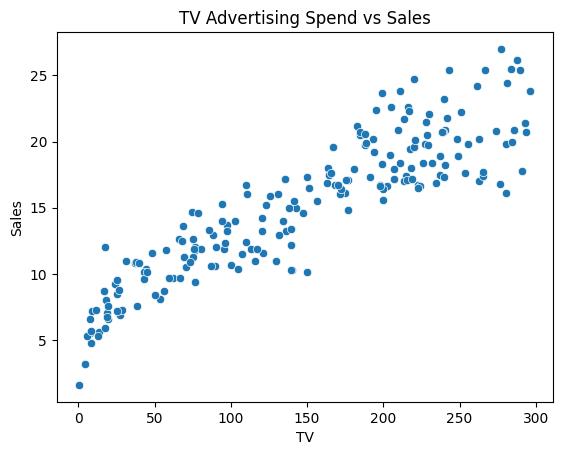

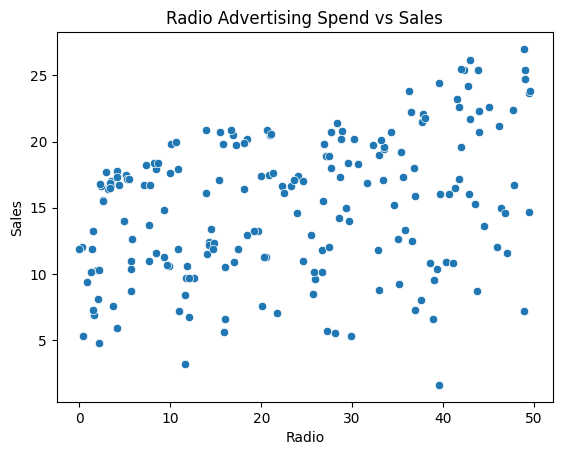

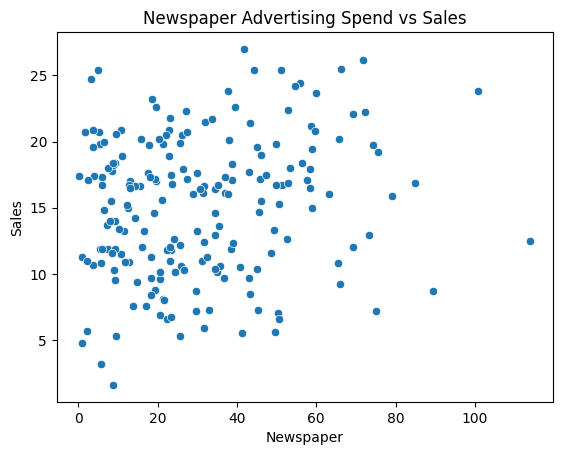

In [81]:
sns.scatterplot(x=df['TV'], y=df['Sales'])
plt.title("TV Advertising Spend vs Sales")
plt.show()

sns.scatterplot(x=df['Radio'], y=df['Sales'])
plt.title("Radio Advertising Spend vs Sales")
plt.show()


sns.scatterplot(x=df['Newspaper'], y=df['Sales'])
plt.title("Newspaper Advertising Spend vs Sales")
plt.show()




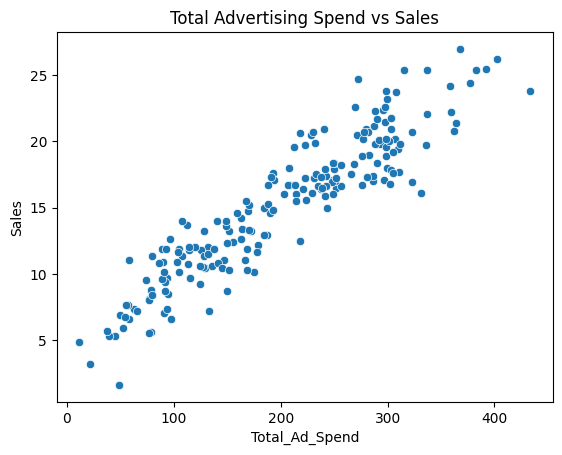

In [82]:
df['Total_Ad_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']
sns.scatterplot(x=df['Total_Ad_Spend'], y=df['Sales'])
plt.title("Total Advertising Spend vs Sales")
plt.show()


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [85]:
df = pd.read_csv("advertising.csv")  # Ensure the correct filename
print(df.head())  # Check the first few rows
print(df.info())  # Check for missing values & data types


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [86]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features (Ad spend)
y = df['Sales']  # Target (Sales)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R² Score: 0.9059011844150826


In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Create polynomial regression model (degree=2 for quadratic)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Evaluate performance
y_pred_poly = poly_model.predict(X_test)
print("Polynomial Regression R² Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression R² Score: 0.9533174341074723


Decision Tree R² Score: 0.9001433012990766


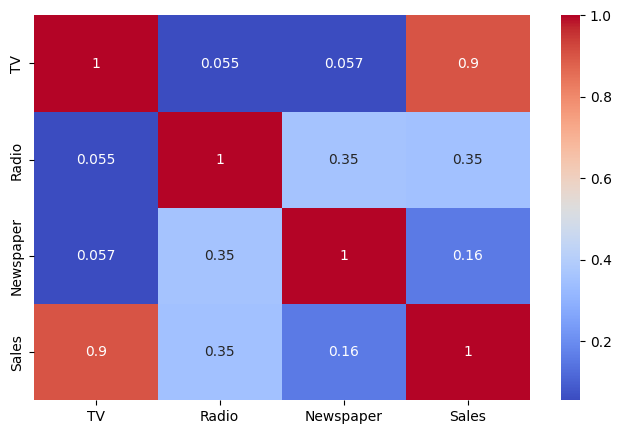

TV: 0.8494
Radio: 0.1353
Newspaper: 0.0153
Test Size 0.1: R² Score = 0.9125420182627615
Test Size 0.2: R² Score = 0.9059011844150826
Test Size 0.3: R² Score = 0.9091484341849799
Test Size 0.4: R² Score = 0.9015917629238268


In [89]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree R² Score:", r2_score(y_test, y_pred_tree))
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Feature importance for Decision Tree
importances = tree_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")
from sklearn.model_selection import train_test_split

# Try different splits
for test_size in [0.1, 0.2, 0.3, 0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    print(f"Test Size {test_size}: R² Score =", model.score(X_test, y_test))


In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run RandomizedSearchCV
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate the model
best_rf_model = rf_random.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest R² Score:", r2_score(y_test, y_pred_rf))

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tuned Random Forest R² Score: 0.9479231160473987
Random Forest R² Score: 0.9475093127198418
XGBoost R² Score: 0.9300037087756442


In [92]:
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    print(f"📊 {model_name} Performance:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))  # Manually compute RMSE
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("-" * 40)


In [93]:
!pip install -U scikit-learn


In [ ]:
import pickle

# Save model
with open('sales_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Load model
with open('sales_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Test loaded model
sample_input = [[200, 30, 20]]  # Example input (TV, Radio, Newspaper)
prediction = loaded_model.predict(sample_input)
print("Predicted Sales:", prediction[0])
import joblib

# Save model
joblib.dump(rf_model, 'sales_model.joblib')

# Load model
loaded_model = joblib.load('sales_model.joblib')
pip install flask
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)

# Load model
model = pickle.load(open('sales_model.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array([data['TV'], data['Radio'], data['Newspaper']]).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'predicted_sales': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)
python app.py
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
evaluate_model(y_test, y_pred_best, "Random Forest (Tuned)")


In [96]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


In [99]:
import pickle

# Assuming 'model' is your trained model
with open("sales_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!


In [98]:
import os
print(os.listdir())  # Lists all files in your working directory


['.config', 'advertising.csv', 'advertising (1).csv', 'IRIS.csv', 'movie_rating_model.pkl', 'Titanic_Predictions_XGBoost (1).csv', 'CODSOFT', 'IMDb Movies India.csv', 'IMDb Movies India (1).csv', 'IMDb Movies India (2).csv', 'Titanic_Predictions.csv', 'Movie_Rating_Predictions.csv', 'sample_data']


In [100]:
import os
print(os.listdir())  # Check if 'sales_model.pkl' appears in the list


['.config', 'advertising.csv', 'advertising (1).csv', 'IRIS.csv', 'movie_rating_model.pkl', 'Titanic_Predictions_XGBoost (1).csv', 'CODSOFT', 'sales_model.pkl', 'IMDb Movies India.csv', 'IMDb Movies India (1).csv', 'IMDb Movies India (2).csv', 'Titanic_Predictions.csv', 'Movie_Rating_Predictions.csv', 'sample_data']


In [101]:
import pickle

# Load trained model
model = pickle.load(open("sales_model.pkl", "rb"))
print("Model loaded successfully!")


Model loaded successfully!


In [102]:
import streamlit as st
import pickle
import numpy as np

# Load trained model
model = pickle.load(open("sales_model.pkl", "rb"))

st.title("📈 Sales Prediction App")
ad_spend = st.number_input("Enter Advertising Spend ($)", min_value=0.0, step=1.0)

if st.button("Predict"):
    prediction = model.predict(np.array([[ad_spend]]))
    st.success(f"Predicted Sales: ${prediction[0]:.2f}")


2025-02-16 05:37:37.419 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:37:37.574 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-16 05:37:37.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:37:37.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:37:37.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:37:37.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:37:37.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:37:37.595 Session state does not 

In [104]:
import streamlit as st
import pickle

# Load trained model
model = pickle.load(open("sales_model.pkl", "rb"))

st.title("📈 Sales Prediction App")

# Example input
ad_spend = st.number_input("Enter Advertising Spend:")
if st.button("Predict"):
    prediction = model.predict([[ad_spend]])
    st.write(f"Predicted Sales: {prediction[0]}")



2025-02-16 05:38:30.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:38:30.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:38:30.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:38:30.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:38:30.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:38:30.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:38:30.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 05:38:30.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar